### 예제
1. csv 폴더에서 4개의 파일을 로드(tran1, tran2, tran_d_1, tran_d_2)
2. tran_1과 tran_2는 단순한 행 추가 결합(유니언 결합)
3. tran_d_1과 tran_d_2도 유니언 결합
4. 2번, 3번 과정에서 나온 데이터프레임을 특정 조건에 맞춰서 2번 데이터프레임 기준으로 열 추가 결합(조인 결합)
5. csv 폴더에 있는 2개의 파일 로드(custom_master, item_master)
6. 4번 과정에서 나온 데이터프레임과 custom_master 조인 결합
7. 6번 과정에서 데이터프레임과 item_master 조인 결합
8. 결합이 된 데이터프레임에서 quantity 컬럼과 item_price 컬럼의 데이터를 가지고 total_price라는 파생변수를 생성(total_price = item_price * quantity)

In [1]:
import pandas as pd

In [2]:
tran1 = pd.read_csv("../csv/tran_1.csv")
tran2 = pd.read_csv("../csv/tran_2.csv")
tran_d_1 = pd.read_csv("../csv/tran_d_1.csv")
tran_d_2 = pd.read_csv("../csv/tran_d_2.csv")

In [3]:
# tran1, tran2 유니언결합
tran = pd.concat([tran1, tran2], axis = 0, ignore_index = True)

In [4]:
trand = pd.concat([tran_d_1, tran_d_2], axis = 0, ignore_index = True)

In [5]:
tran.head(1)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502


In [6]:
trand.head(1)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1


In [7]:
# tran, trand를 조인 결합(조건 : trandaction_id, how = tran)
tran = pd.merge(tran, trand, on = 'transaction_id', how = 'left')

In [8]:
# 2개의 파일을 로드
customer_master = pd.read_csv("../csv/customer_master.csv")
item_master = pd.read_csv("../csv/item_master.csv")

In [9]:
# tran, customer_master 조인 결합 (조건 : customer_id, how : inner, left)
total_df = pd.merge(tran, customer_master, on = 'customer_id', how = 'inner')

In [10]:
# total_df, item_master 조인 결합(조건 : item_id, how : inner)
total_df = pd.merge(total_df, item_master, on = 'item_id', how = 'inner')

In [11]:
# 새로운 파생변수 생성 total_price
total_df['total_price'] = total_df['item_price'] * total_df['quantity']

In [12]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000


In [19]:
# 거래의 금액이 가장 좋은 아이템은 무엇인가?
group_data = total_df[['item_name', 'total_price']].groupby('item_name').sum()

In [22]:
# 내림차순 정렬
group_data.sort_values('total_price', ascending = False).index[0]

'PC-E'

In [23]:
total_df['gender']

0       M
1       F
2       F
3       M
4       M
       ..
6064    M
6065    M
6066    M
6067    M
6068    M
Name: gender, Length: 6069, dtype: object

In [24]:
origin_data = total_df.copy()

In [25]:
# loc를 이용하여 m, f를 변경
# m -> 남자, f -> 여자
total_df.loc[total_df['gender'] == 'M', 'gender'] = '남자'
total_df.loc[total_df['gender'] == 'F', 'gender'] = '여자'

In [26]:
total_df['gender'].value_counts()

남자    3268
여자    2801
Name: gender, dtype: int64

In [27]:
total_df = origin_data.copy()

In [29]:
total_df['gender'].value_counts()

M    3268
F    2801
Name: gender, dtype: int64

In [30]:
# apply() 사용하여 남자, 여자 변경

def change(x):
    # x는 M 아니면 F
    if x == 'M':
        result = '남자'
    else:
        result = '여자'
    return result

total_df['gender'].apply(change)

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [34]:
total_df['gender'].apply(lambda x: '남자' if (x == 'M') else ('여자' if (x == 'F') else '무응답'))

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [35]:
## payment_date 컬럼을 시계열 데이터로 변경
# to_datetime()
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000


In [36]:
total_df['payment_date'] = pd.to_datetime(total_df['payment_date'], format = "%Y-%m-%d %H:%M:%S")

In [37]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6069 entries, 0 to 6068
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  6069 non-null   object        
 1   price           6069 non-null   int64         
 2   payment_date    6069 non-null   datetime64[ns]
 3   customer_id     6069 non-null   object        
 4   detail_id       6069 non-null   int64         
 5   item_id         6069 non-null   object        
 6   quantity        6069 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   int64         
 14  item_name       6069 non-null   object        
 15  item

In [40]:
# 시계열 데이터에서 월-년 추출해서 새로운 파생변수 payment_month 생성
total_df['payment_month'] = total_df['payment_date'].dt.strftime('%m - %Y')

In [41]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000,02 - 2019


In [44]:
# 월별 거래량을 확인
group_data = total_df[['payment_month', 'total_price']].groupby('payment_month').agg(['mean', 'sum'])

In [45]:
group_data

total_price           
                        mean        sum
payment_month                          
02 - 2019      137592.964824  136905000
03 - 2019      135154.382470  135695000
04 - 2019      136106.106106  135970000
05 - 2019      133551.307847  132750000
06 - 2019      135747.800587  138870000
07 - 2019      138377.609108  145850000

In [46]:
pivot_data = pd.pivot_table(
    total_df,
    index = 'payment_month',
    aggfunc = ['sum', 'mean', 'min', 'max', 'std'],
    values = 'total_price'
)

In [47]:
pivot_data

,sum,mean,min,max,std
,total_price,total_price,total_price,total_price,total_price
payment_month,,,,,
02 - 2019,136905000,137592.964824,50000,420000,68848.024325
03 - 2019,135695000,135154.382470,50000,420000,69144.112878
04 - 2019,135970000,136106.106106,50000,420000,69473.778972
05 - 2019,132750000,133551.307847,50000,420000,68905.731855
06 - 2019,138870000,135747.800587,50000,420000,67480.539578
07 - 2019,145850000,138377.609108,50000,420000,68827.693467


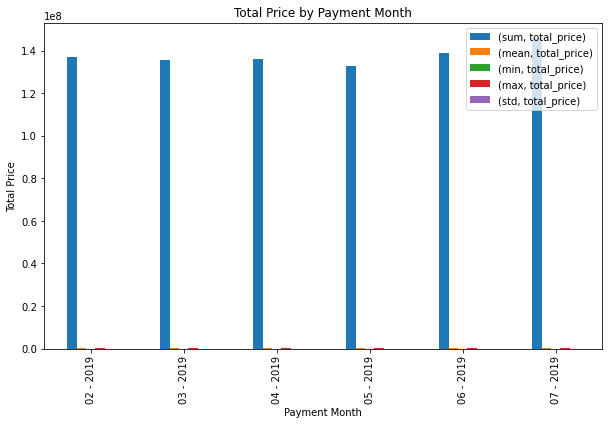

In [52]:
import matplotlib.pyplot as plt

# 막대 그래프 생성
pivot_data.plot(kind='bar', figsize=(10, 6))

# 그래프 제목과 축 레이블 설정
plt.title('Total Price by Payment Month')
plt.xlabel('Payment Month')
plt.ylabel('Total Price')

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()